> 原文: https://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

> 译者: knight

> 基于[CC BY 4.0](http://creativecommons.org/licenses/by/4.0/)协议发布
 
> alab.group 2019-10-26 更新

这是一个pandas的简短介绍，面向初学者，你可以在[Cookbook](https://pandas.pydata.org/pandas-docs/version/0.17.0/cookbook.html#cookbook)看到更多细节

导入Pandas常用库

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 对象创建
[Data Structure intro section](https://pandas.pydata.org/pandas-docs/version/0.17.0/dsintro.html#dsintro)了解更多

**pandas中的数据结构 :**

+ Series: 一维数组，类似于python中的基本数据结构list，区别是series只允许存储相同的数据类型，这样可以更有效的使用内存，提高运算效率。就像数据库中的列数据。
+ DataFrame: 二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。
+ Panel：三维的数组，可以理解为DataFrame的容器。

*Series*

In [301]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

*DataFrame*
创建一个日期index,标签columns的numpy array

In [302]:
dates = pd.date_range('20130101',periods=6)
# dates

df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017
2013-01-06,0.166078,2.402550,0.903355,-0.629768


通过把dict类型转变成series-like创建一个DataFrame

In [303]:
df2=pd.DataFrame({'A':1,
                  'B':pd.Timestamp('20130102'),
                  'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D':np.array([3]*4,dtype='int32'),
                  'E':pd.Categorical(['test','train','test','train']),
                  'F':'foo'
})
df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


具有特定的dtype

In [304]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据
[Basics section](https://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html#basics)了解更多

看DataFrame的头行(head)和尾行(tail)

In [305]:
df.head()

,A,B,C,D
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017


In [306]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017
2013-01-06,0.166078,2.402550,0.903355,-0.629768


显示 index,columns,底层numpy data

In [307]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [308]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [309]:
df.values

array([[ 0.25016492,  0.87026925, -0.1958887 , -0.5247317 ],
       [ 0.48686974,  0.32447882, -1.22217681,  0.35423543],
       [-1.62781467, -0.5309305 , -0.42953446, -0.80446892],
       [-0.32312069, -0.94574912,  1.04359329, -1.01250695],
       [-0.86763968, -0.59999649,  1.18118445, -0.56801684],
       [ 0.16607793,  2.40254962,  0.90335546, -0.62976845]])

描述显示了您的数据的快速统计摘要

In [310]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.319244,0.253437,0.213422,-0.530876
std,0.802832,1.247866,0.974026,0.469349
min,-1.627815,-0.945749,-1.222177,-1.012507
25%,-0.731510,-0.582730,-0.371123,-0.760794
50%,-0.078521,-0.103226,0.353733,-0.598893
75%,0.229143,0.733822,1.008534,-0.535553
max,0.486870,2.402550,1.181184,0.354235


转换你的数据

In [311]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.250165,0.486870,-1.627815,-0.323121,-0.867640,0.166078
B,0.870269,0.324479,-0.530930,-0.945749,-0.599996,2.402550
C,-0.195889,-1.222177,-0.429534,1.043593,1.181184,0.903355
D,-0.524732,0.354235,-0.804469,-1.012507,-0.568017,-0.629768


按axis排序

In [312]:
df.sort_index(axis=1,ascending=False)#axis=0,行，axis=1,列，默认0,  ascending从小到大

,D,C,B,A
2013-01-01,-0.524732,-0.195889,0.870269,0.250165
2013-01-02,0.354235,-1.222177,0.324479,0.486870
2013-01-03,-0.804469,-0.429534,-0.530930,-1.627815
2013-01-04,-1.012507,1.043593,-0.945749,-0.323121
2013-01-05,-0.568017,1.181184,-0.599996,-0.867640
2013-01-06,-0.629768,0.903355,2.402550,0.166078


按值排序

In [313]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-06,0.166078,2.402550,0.903355,-0.629768


## 选择
Note:推荐使用pandas  at  iat  loc iloc and ix<br>
[indexing and Selecing Data](https://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing)<br>
[MultilIndex/Advanced Indexing](https://pandas.pydata.org/pandas-docs/version/0.17.0/advanced.html#advanced)<br>
了解更多

Getting

选择一列，产生一个Series,等同于df.A

In [314]:
df['A']

2013-01-01    0.250165
2013-01-02    0.486870
2013-01-03   -1.627815
2013-01-04   -0.323121
2013-01-05   -0.867640
2013-01-06    0.166078
Freq: D, Name: A, dtype: float64

通过[]选择，做行的切片

In [315]:
df[0:3]

,A,B,C,D
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469


In [316]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507


根据Label选择<br>
[Selection by Label](https://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-label)了解更多<br>

使用Label来获取截面

In [317]:
df.loc[dates[0]]

A    0.250165
B    0.870269
C   -0.195889
D   -0.524732
Name: 2013-01-01 00:00:00, dtype: float64

使用Label在multi-axis(多轴)进行选择

In [318]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.250165,0.870269
2013-01-02,0.486870,0.324479
2013-01-03,-1.627815,-0.530930
2013-01-04,-0.323121,-0.945749
2013-01-05,-0.867640,-0.599996
2013-01-06,0.166078,2.402550


展示Label切片,包含全部右端

In [319]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.486870,0.324479
2013-01-03,-1.627815,-0.530930
2013-01-04,-0.323121,-0.945749


返回对象的尺寸缩减

In [320]:
df.loc['20130102',['A','B']]

A    0.486870
B    0.324479
Name: 2013-01-02 00:00:00, dtype: float64

用于获取标量值

In [321]:
df.loc[dates[0],'A']

0.2501649230104152

用于快速访问标量(等同于先前的方法)

In [322]:
df.at[dates[0],'A']

0.2501649230104152

## 按position选择<br>
[Selection by Position](https://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-integer)了解更多

通过传递的整数的位置选择

In [323]:
df

,A,B,C,D
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017
2013-01-06,0.166078,2.402550,0.903355,-0.629768


In [324]:
df.iloc[3]

A   -0.323121
B   -0.945749
C    1.043593
D   -1.012507
Name: 2013-01-04 00:00:00, dtype: float64

按整数切片计算，其作用类似于numpy/python(右边不包括)

In [325]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.323121,-0.945749
2013-01-05,-0.867640,-0.599996


按整数位置列表，类似于numpy/python样式

In [326]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.486870,-1.222177
2013-01-03,-1.627815,-0.429534
2013-01-05,-0.867640,1.181184


对行进行显式切片

In [327]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469


对列进行显式切片

In [328]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.870269,-0.195889
2013-01-02,0.324479,-1.222177
2013-01-03,-0.530930,-0.429534
2013-01-04,-0.945749,1.043593
2013-01-05,-0.599996,1.181184
2013-01-06,2.402550,0.903355


用于显式地获取值。

In [329]:
df.iloc[1,1]

0.32447881832646636

用于快速访问标量(等同于先前的方法)

In [330]:
df.iat[1,1]

0.32447881832646636

## Boolean索引

使用单个列的值来选择数据。

In [331]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.250165,0.870269,-0.195889,-0.524732
2013-01-02,0.486870,0.324479,-1.222177,0.354235
2013-01-06,0.166078,2.402550,0.903355,-0.629768


获取的where方法

In [332]:
df[df>0]

,A,B,C,D
2013-01-01,0.250165,0.870269,NaN,NaN
2013-01-02,0.486870,0.324479,NaN,0.354235
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,1.043593,NaN
2013-01-05,NaN,NaN,1.181184,NaN
2013-01-06,0.166078,2.402550,0.903355,NaN


用isin（）方法过滤

In [333]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.250165,0.870269,-0.195889,-0.524732,one
2013-01-02,0.486870,0.324479,-1.222177,0.354235,one
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469,two
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507,three
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017,four
2013-01-06,0.166078,2.402550,0.903355,-0.629768,three


In [334]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469,two
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017,four


## 设置

设置新列将自动根据索引对齐数据。

In [335]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [336]:
df['F']=s1

通过Label设置值

In [337]:
df.at[dates[0],'A']=0
df

,A,B,C,D,F
2013-01-01,0.000000,0.870269,-0.195889,-0.524732,NaN
2013-01-02,0.486870,0.324479,-1.222177,0.354235,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469,2.0
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507,3.0
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017,4.0
2013-01-06,0.166078,2.402550,0.903355,-0.629768,5.0


通过位置设置值

In [338]:
df.iat[0,1]=0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.195889,-0.524732,NaN
2013-01-02,0.486870,0.324479,-1.222177,0.354235,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,-0.804469,2.0
2013-01-04,-0.323121,-0.945749,1.043593,-1.012507,3.0
2013-01-05,-0.867640,-0.599996,1.181184,-0.568017,4.0
2013-01-06,0.166078,2.402550,0.903355,-0.629768,5.0


通过使用numpy数组赋值来设置

In [339]:
df.loc[:,'D']=np.array([5]*len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.195889,5,NaN
2013-01-02,0.486870,0.324479,-1.222177,5,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,5,2.0
2013-01-04,-0.323121,-0.945749,1.043593,5,3.0
2013-01-05,-0.867640,-0.599996,1.181184,5,4.0
2013-01-06,0.166078,2.402550,0.903355,5,5.0


A where operation with setting.

In [340]:
df2=df.copy()
df2[df2>0]=-df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.195889,-5,NaN
2013-01-02,-0.486870,-0.324479,-1.222177,-5,-1.0
2013-01-03,-1.627815,-0.530930,-0.429534,-5,-2.0
2013-01-04,-0.323121,-0.945749,-1.043593,-5,-3.0
2013-01-05,-0.867640,-0.599996,-1.181184,-5,-4.0
2013-01-06,-0.166078,-2.402550,-0.903355,-5,-5.0


## 缺失值处理

pandas主要使用np.nan值来表示丢失的数据。默认情况下，它不包括在计算中。<br>
[Missing Data section](https://pandas.pydata.org/pandas-docs/version/0.17.0/missing_data.html#missing-data)了解更多

Reindexing允许您在指定的轴上change/add/delete索引。这将返回数据的副本。

In [341]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.195889,5,NaN,1.0
2013-01-02,0.486870,0.324479,-1.222177,5,1.0,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,5,2.0,NaN
2013-01-04,-0.323121,-0.945749,1.043593,5,3.0,NaN


drop任何含有NaN的行

In [342]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.48687,0.324479,-1.222177,5,1.0,1.0


用指定内容填充NaN数据

In [343]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.195889,5,5.0,1.0
2013-01-02,0.486870,0.324479,-1.222177,5,1.0,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,5,2.0,5.0
2013-01-04,-0.323121,-0.945749,1.043593,5,3.0,5.0


获取值为nan的布尔掩码

In [344]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations<br>
[Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html#basics-binop)了解更多

Stats(统计)<br>
操作一般不包括丢失的数据。

执行描述性的统计

In [345]:
df.mean()

A   -0.360938
B    0.108392
C    0.213422
D    5.000000
F    3.000000
dtype: float64

其他axis的操作

In [346]:
df.mean(1)

2013-01-01    1.201028
2013-01-02    1.117834
2013-01-03    0.882344
2013-01-04    1.554945
2013-01-05    1.742710
2013-01-06    2.694397
Freq: D, dtype: float64

操作对象具有不同的维度和需要对齐。此外，pandas自动沿指定的维度广播。

In [347]:
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(3)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    NaN
2013-01-04    1.0
2013-01-05    3.0
2013-01-06    5.0
Freq: D, dtype: float64

In [348]:
df.sub(s,axis='index')#在df和s的交集中的数字减去相对应的index

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,-1.323121,-1.945749,0.043593,4.0,2.0
2013-01-05,-3.867640,-3.599996,-1.818816,2.0,1.0
2013-01-06,-4.833922,-2.597450,-4.096645,0.0,0.0


In [349]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.195889,5,NaN
2013-01-02,0.486870,0.324479,-1.222177,5,1.0
2013-01-03,-1.627815,-0.530930,-0.429534,5,2.0
2013-01-04,-0.323121,-0.945749,1.043593,5,3.0
2013-01-05,-0.867640,-0.599996,1.181184,5,4.0
2013-01-06,0.166078,2.402550,0.903355,5,5.0


## Apply

在data上应用函数

In [350]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.195889,5,NaN
2013-01-02,0.486870,0.324479,-1.418066,10,1.0
2013-01-03,-1.140945,-0.206452,-1.847600,15,3.0
2013-01-04,-1.464066,-1.152201,-0.804007,20,6.0
2013-01-05,-2.331705,-1.752197,0.377178,25,10.0
2013-01-06,-2.165627,0.650352,1.280533,30,15.0


In [351]:
df.apply(lambda x:x.max()-x.min())

A    2.114684
B    3.348299
C    2.403361
D    0.000000
F    4.000000
dtype: float64

## Histogramming(组织语法)

[Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html#basics-discretization)了解更多

In [352]:
s=pd.Series(np.random.randint(0,7,size=10))
s

0    1
1    3
2    2
3    6
4    0
5    2
6    4
7    0
8    5
9    5
dtype: int64

In [353]:
s.value_counts()

5    2
2    2
0    2
6    1
4    1
3    1
1    1
dtype: int64

## String Methods

Series在str属性中配备了一组字符串处理方法，这样可以轻松地对数组的每个元素进行操作，如下面的代码片段所示。注意，str中的模式匹配在默认情况下通常使用正则表达式(在某些情况下总是使用它们)。<br>
[Vectorized String Methods.](https://pandas.pydata.org/pandas-docs/version/0.17.0/text.html#text-string-methods)了解更多

In [354]:
s=pd.Series(['A','B','C','AaBa',np.nan,'BACA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4     NaN
5    baca
6     dog
7     cat
dtype: object

## Merge(合并)

Concat(连接)

在连接/合并类型操作的情况下，Pandas提供了各种方便地将Series、DataFrame和Panel对象组合在一起的各种集合逻辑，用于索引和关系代数功能。<br>
[Merging section](https://pandas.pydata.org/pandas-docs/version/0.17.0/merging.html#merging)了解更多

用concat（）把pandas连接在一起

In [355]:
df=pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.908456,-0.301940,-0.680612,-0.606535
1,0.107576,1.032624,-0.564596,0.815207
2,1.425856,-1.412483,0.218162,0.900385
3,1.067671,-0.730832,0.794102,3.284040
4,1.422626,-0.122189,-0.521646,0.638998
5,-1.330521,-1.883172,-0.294044,-0.447277
6,0.100635,-0.058069,-0.512671,2.685025
7,0.301758,0.284307,0.087774,-0.743961
8,1.919635,0.134707,1.405376,0.684185
9,-0.297285,0.896067,1.528394,-1.700096


In [356]:
pieces=[df[:3],df[3:7],df[7:]]#df[:3]:前三行 df[3:7]:四到七行  df[7:]:七行到最后一行
pd.concat(pieces)

,0,1,2,3
0,0.908456,-0.301940,-0.680612,-0.606535
1,0.107576,1.032624,-0.564596,0.815207
2,1.425856,-1.412483,0.218162,0.900385
3,1.067671,-0.730832,0.794102,3.284040
4,1.422626,-0.122189,-0.521646,0.638998
5,-1.330521,-1.883172,-0.294044,-0.447277
6,0.100635,-0.058069,-0.512671,2.685025
7,0.301758,0.284307,0.087774,-0.743961
8,1.919635,0.134707,1.405376,0.684185
9,-0.297285,0.896067,1.528394,-1.700096


## Join

SQL样式合并<br>
[Database style joining](https://pandas.pydata.org/pandas-docs/version/0.17.0/merging.html#merging-join)了解更多

In [357]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [358]:
right

,key,rval
0,foo,4
1,foo,5


In [359]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append(添加)<br>
DataFrame添加行，[Appending](https://pandas.pydata.org/pandas-docs/version/0.17.0/merging.html#merging-concatenation)了解更多

In [360]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,0.830999,1.193758,0.914050,0.075893
1,-0.468953,0.119980,0.855445,2.242427
2,1.542781,-0.816282,0.665119,0.444702
3,-1.806827,-0.497698,-0.492578,-0.265514
4,2.272029,-1.504732,0.933208,-1.754743
5,-0.286151,1.520573,1.480995,-0.162035
6,0.445634,1.886769,-1.543252,0.730019
7,-2.903715,-0.134018,-0.232799,-0.240283


In [361]:
s=df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,0.830999,1.193758,0.914050,0.075893
1,-0.468953,0.119980,0.855445,2.242427
2,1.542781,-0.816282,0.665119,0.444702
3,-1.806827,-0.497698,-0.492578,-0.265514
4,2.272029,-1.504732,0.933208,-1.754743
5,-0.286151,1.520573,1.480995,-0.162035
6,0.445634,1.886769,-1.543252,0.730019
7,-2.903715,-0.134018,-0.232799,-0.240283
8,-1.806827,-0.497698,-0.492578,-0.265514


## Grouping(分组)<br>
group by 我们指的是涉及以下一个或多个步骤的过程<br>
+ Splitting 依照标准切分数据分组
+ Applying  为每个组独立应用函数
+ Combining 联合结果形成数据集

In [362]:
df=pd.DataFrame({'A':['foo','bar','foo','bar',
                     'foo','bar','foo','foo'],
                 'B':['one','one','two','three',
                     'two','two','one','three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.685535,-0.302591
1,bar,one,-0.661543,0.022364
2,foo,two,-2.676579,-0.409940
3,bar,three,1.404296,-0.107943
4,foo,two,-1.380409,1.524568
5,bar,two,-0.939503,-0.275285
6,foo,one,-0.555141,0.030114
7,foo,three,-0.086235,0.325047


Group然后应用sum函数给结果集

In [363]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.196751,-0.360864
foo,-5.383900,1.167197


按多个列group形成一个分层索引，然后我们应用该函数。

In [364]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.661543  0.022364
    three  1.404296 -0.107943
    two   -0.939503 -0.275285
foo one   -1.240676 -0.272477
    three -0.086235  0.325047
    two   -4.056988  1.114627

## Reshaping(重排)

[ Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/version/0.17.0/advanced.html#advanced-hierarchical)and[Reshaping.](https://pandas.pydata.org/pandas-docs/version/0.17.0/reshaping.html#reshaping-stacking)了解更多

Stack

In [365]:
tuples=list(zip(*[['bar','bar','baz','baz',
                   'foo','foo','qux','qux'],
                  ['one','two','one','two',
                   'one','two','one','two'
                      ]]))
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df

A         B
first second                    
bar   one     0.350831  0.171686
      two     1.569628  0.170396
baz   one    -0.615438  1.251830
      two    -0.416751  0.222122
foo   one     1.917581 -1.654141
      two     1.154954  0.855226
qux   one     0.426627 -0.845541
      two     0.779405 -1.176019

stack()方法“压缩”DataFrame列中的一个级别。

In [366]:
stacked=df2.stack()
stacked

first  second   
bar    one     A    0.350831
               B    0.171686
       two     A    1.569628
               B    0.170396
baz    one     A   -0.615438
               B    1.251830
       two     A   -0.416751
               B    0.222122
dtype: float64

使用stacked DataFrame或Series(以MultiIndex作为索引),stack()的反向操作是unstack()，默认情况下，这会将最后一个级别unstack：

In [367]:
stacked.unstack()

A         B
first second                    
bar   one     0.350831  0.171686
      two     1.569628  0.170396
baz   one    -0.615438  1.251830
      two    -0.416751  0.222122

In [368]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.350831  1.569628
      B  0.171686  0.170396
baz   A -0.615438 -0.416751
      B  1.251830  0.222122

In [369]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.350831 -0.615438
       B  0.171686  1.251830
two    A  1.569628 -0.416751
       B  0.170396  0.222122

## Pivot Tables(透视表)
[ Pivot Tables](https://pandas.pydata.org/pandas-docs/version/0.17.0/reshaping.html#reshaping-pivot)了解更多

In [370]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                'B':['A','B','C']*4,
                'C':['foo','foo','foo','bar','bar','bar']*2,
                'D':np.random.randn(12),
                'E':np.random.randn(12)
                 })
df

,A,B,C,D,E
0,one,A,foo,0.076061,-0.533569
1,one,B,foo,-0.706674,-0.213712
2,two,C,foo,-1.065382,1.684210
3,three,A,bar,-0.683536,0.212442
4,one,B,bar,0.373959,0.351152
5,one,C,bar,0.576658,-0.872747
6,two,A,foo,1.237892,-2.172026
7,three,B,foo,2.379749,1.104696
8,one,C,foo,0.171342,-0.255630
9,one,A,bar,-1.350792,-0.526715


我们可以非常容易地根据这些数据生成透视表

In [371]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -1.350792  0.076061
      B  0.373959 -0.706674
      C  0.576658  0.171342
three A -0.683536       NaN
      B       NaN  2.379749
      C -1.397933       NaN
two   A       NaN  1.237892
      B -1.006639       NaN
      C       NaN -1.065382

## Time Series (时间序列)

Pandas具有简单、强大和高效的功能，可以在频率转换过程中执行重采样操作(例如，将第二次数据转换为5分钟数据)。这在金融应用中非常普遍，但不限于金融应用。<br>
[Time Series section](https://pandas.pydata.org/pandas-docs/version/0.17.0/timeseries.html#timeseries)了解更多

In [372]:
rng = pd.date_range('1/2/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min',how='sum')
# ts

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


2012-01-02    23053
Freq: 5T, dtype: int64

时区表示

In [373]:
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06   -1.604417
2012-03-07   -0.669703
2012-03-08    0.848214
2012-03-09    0.005223
2012-03-10    1.115218
Freq: D, dtype: float64

In [374]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.604417
2012-03-07 00:00:00+00:00   -0.669703
2012-03-08 00:00:00+00:00    0.848214
2012-03-09 00:00:00+00:00    0.005223
2012-03-10 00:00:00+00:00    1.115218
Freq: D, dtype: float64

转换到另一个时区

In [375]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.604417
2012-03-06 19:00:00-05:00   -0.669703
2012-03-07 19:00:00-05:00    0.848214
2012-03-08 19:00:00-05:00    0.005223
2012-03-09 19:00:00-05:00    1.115218
Freq: D, dtype: float64

时间跨度表示之间的转换

In [376]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31    0.362407
2012-02-29    1.170527
2012-03-31    1.113878
2012-04-30   -0.320955
2012-05-31   -0.188814
Freq: M, dtype: float64

In [377]:
ps=ts.to_period()
ps

2012-01    0.362407
2012-02    1.170527
2012-03    1.113878
2012-04   -0.320955
2012-05   -0.188814
Freq: M, dtype: float64

In [378]:
ps.to_timestamp()

2012-01-01    0.362407
2012-02-01    1.170527
2012-03-01    1.113878
2012-04-01   -0.320955
2012-05-01   -0.188814
Freq: MS, dtype: float64

在周期和时间戳之间进行转换，可以使用一些方便的算术函数。在下面的例子中，我们将截至11月的季度频率转换为季度结束后的月底的上午9时：

In [379]:
prng=pd.period_range('1990Q1','2004Q4',freq='Q-NOV')
ts=pd.Series(np.random.randn(len(prng)),prng)
ts.index=(prng.asfreq('M','e')+1).asfreq('H','s')+9
ts.head()

1990-03-01 09:00    1.384482
1990-06-01 09:00   -0.291550
1990-09-01 09:00   -0.398281
1990-12-01 09:00    0.362416
1991-03-01 09:00    0.355084
Freq: H, dtype: float64

## Categoricals<br>
从0.15版本开始，Pandas可以在DataFrame中包含逻辑数据<br>
[ categorical introduction ](https://pandas.pydata.org/pandas-docs/version/0.17.0/categorical.html#categorical)and[ API documentation.](https://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#api-categorical)了解更多

In [380]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})

将原始等级转换为(categorical )分类数据类型。

In [381]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别重命名为更有意义的名称(将其赋值给Series.cat.Directory)

In [382]:
df['grade'].cat.categories=['very good','good','very bad']

重新排序类别，并同时添加缺失的类别(Series.cat下的方法在默认情况下返回一个新的Series)。

In [383]:
df['grade']=df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是类别中的每个顺序，而不是词法顺序。

In [384]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按分类列分组也显示空类别。

In [385]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting(画图)<br>
[Plotting](https://pandas.pydata.org/pandas-docs/version/0.17.0/visualization.html#visualization)了解更多

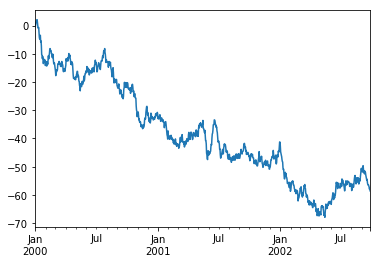

In [386]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

在DataFrame上，plot()可以方便地绘制带有标签的所有列：

<Figure size 432x288 with 0 Axes>

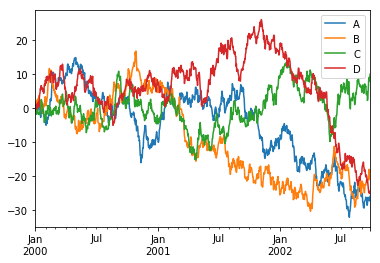

In [387]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df
df=df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

## Getting Data In/Out

CSV

[Writing to a csv file](https://pandas.pydata.org/pandas-docs/version/0.17.0/io.html#io-store-in-csv)

In [388]:
df.to_csv('foo.csv')

[Reading from a csv file](https://pandas.pydata.org/pandas-docs/version/0.17.0/io.html#io-read-csv-table)

In [389]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.262418,-0.973661,-0.836868,0.271310
1,2000-01-02,1.053720,1.242977,0.391209,0.360579
2,2000-01-03,0.973668,0.853854,-0.195173,-0.491975
3,2000-01-04,1.556761,1.200352,-1.589201,-0.311251
4,2000-01-05,0.075619,2.095207,-1.943827,1.013998
5,2000-01-06,0.716814,1.926294,-1.290699,0.847989
6,2000-01-07,-0.150489,1.416625,0.875681,-0.049301
7,2000-01-08,-0.452076,2.579747,-0.386353,1.059424
8,2000-01-09,-0.577578,1.806055,-1.564591,0.521789
9,2000-01-10,1.187599,2.227424,-1.815274,1.650260


## HDFS

Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/version/0.17.0/io.html#io-hdf5)<br>
Writing to a HDFS Store

In [400]:
# df.to_hdf('foo.h5',key='df')#pip install tables  /  pip install --upgrade tables 解决

Reading from a HDF5 Store

In [401]:
# pd.read_hdf('foo.h5','df')

## Excel

Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/version/0.17.0/io.html#io-excel)

Writing to an excel file

In [ ]:
#df.to_excel('foo.xlsx', sheet_name='Sheet1') #pip  install openpyxl#解决办法:pip install --upgrade tables

Reading from an excel file

In [ ]:
#pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

## Gotchas

如果您正在尝试一个操作，并且看到一个异常，如下所示

In [407]:
if pd.Series([False, True, False]):
    print("I was true")
Traceback

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

看[Comparisons](https://pandas.pydata.org/pandas-docs/version/0.17.0/basics.html#basics-compare)来解释和做些什么。<br>
看[Gotchas](https://pandas.pydata.org/pandas-docs/version/0.17.0/gotchas.html#gotchas)也一样